## Support Vector Machines

## Learning Objectives

*After this lesson, students will be able to:*
1. **Describe** linear separability.
2. **Differentiate between** maximal margin classifiers, support vector classifiers, and support vector machines.
3. **Implement** SVMs in `scikit-learn`.
4. **Describe** the effects of `C` and kernels on SVMs.



**Note**: If you read resources online, you may see terms like "abscissa," "Lagrange multipliers," and "convex optimization." SVMs are pretty mathematical in nature, but we've tried to strip most of the complex terminology away and boil SVMs down to their important points.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## An Intuitive Classifier

Today, we're going to learn a very intuitive classifier. 

The one we focus on today is called the **support vector machine**.

#### NOTE: There are three **very** closely related classification algorithms. 
These are:
- the maximal margin classifier, 
- the support vector classifier, and 
- the support vector machine. 

Practically, we're going to really only use the support vector machine (often abbreviated SVM). But people often use the term "support vector machine" to refer to all three of the above classification algorithms.

In [2]:
age_train = [25, 30, 35, 35, 50, 45, 50, 55, 65, 65]
income_train = [50, 70, 60, 70, 65, 30, 40, 45, 30, 60]
party_train = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

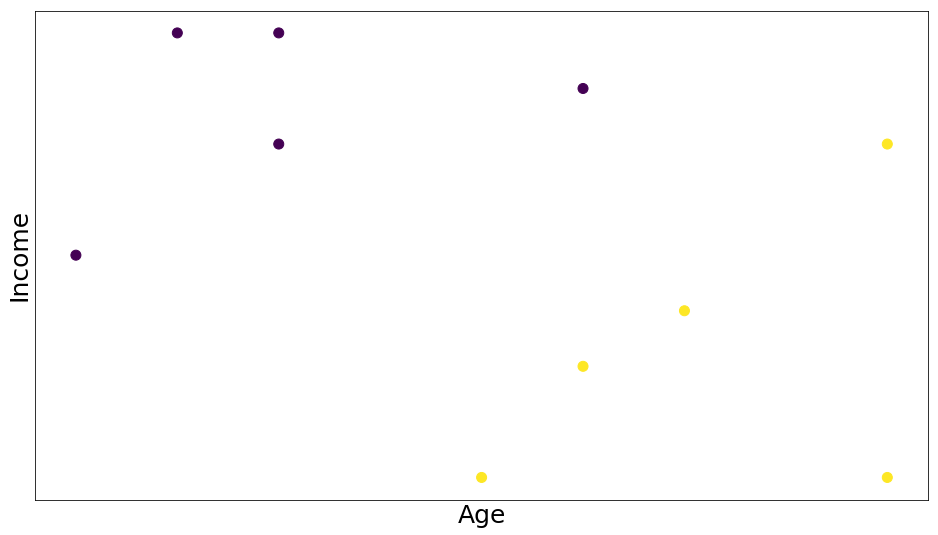

In [3]:
plt.figure(figsize=(16,9))
plt.xlabel("Age", fontsize = 25)
plt.ylabel("Income", fontsize = 25)
plt.xticks([])
plt.yticks([])
plt.scatter(age_train, income_train, c=party_train, s=100);

- Note that the axes are two features: Age and Income.
- Note that the $y$ variable here we want to predict is political party. Purple corresponds to one political party and yellow corresponds to another political party.

<details><summary>Looking at this plot, how might we intuitively create a classifier to differentiate between the purple political party and the yellow political party?</summary>
```
Draw a diagonal line through the plot. This line should be drawn such that all of the purple dots are on one side of the line and all of the yellow dots are on the other side of the line.
```
</details>

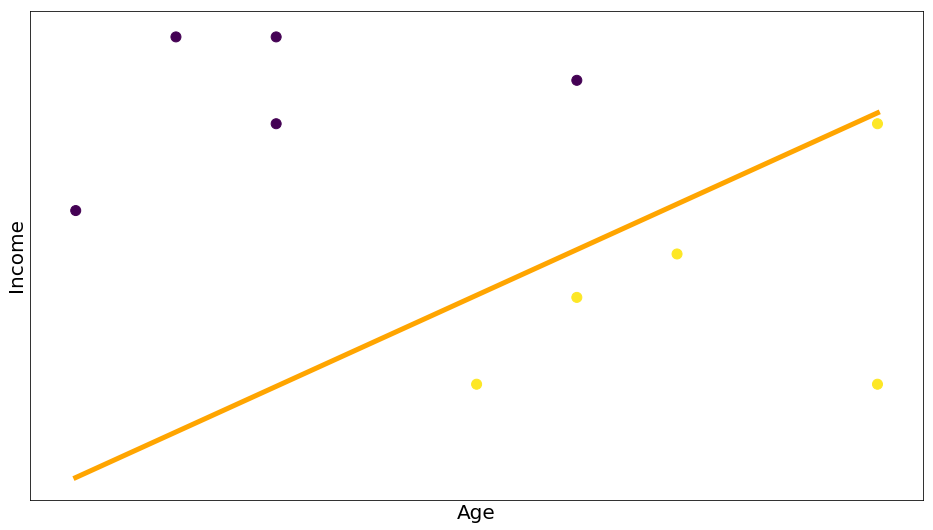

In [4]:
# Set plot up.
plt.figure(figsize=(16,9))
plt.xlabel("Age", fontsize = 20)
plt.ylabel("Income", fontsize = 20)
plt.xticks([])
plt.yticks([])

## Plot classification line.
x = np.linspace(min(age_train), max(age_train))
plt.plot(x, 1.05 * x - 7, c = 'orange', lw = 5)

## Generate scatterplot.
plt.scatter(age_train, income_train, c=party_train, s=100);

<details><summary>Do you like this line? Why or why not?</summary>
```
- The line perfectly classifies political party based on our *training* data.
- However, the line is very close to our yellow political party. If we have any testing data that is even a little bit different than our training data, we might misclassify our testing observations.
- Example: A member of the yellow political party at (65, 65) would be on the "wrong" side of the line.
- This line appears to not be very robust to deviations from our training data.
```
</details>

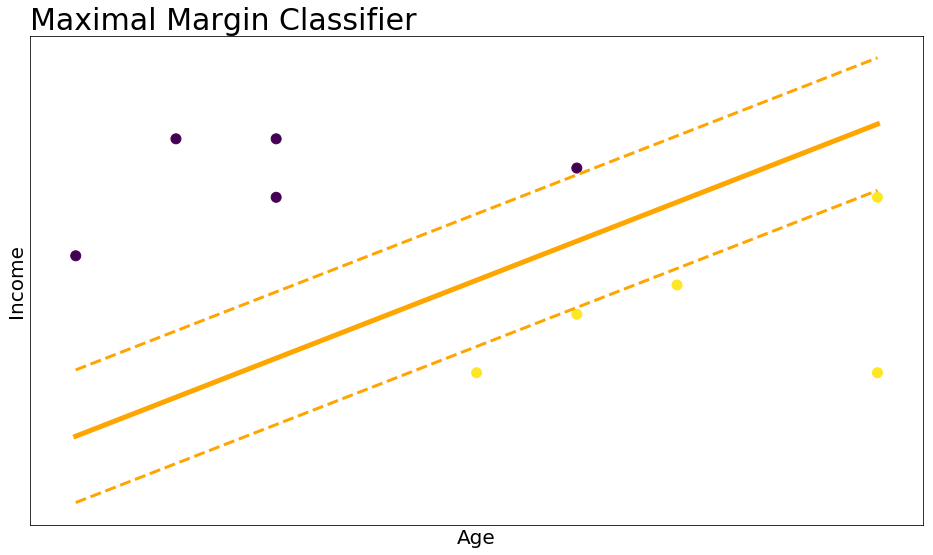

In [5]:
# Set plot up.
plt.figure(figsize=(16,9))
plt.xlabel("Age", fontsize = 20)
plt.ylabel("Income", fontsize = 20)
plt.xticks([])
plt.yticks([])
x = np.linspace(min(age_train), max(age_train))

## Line of best fit. (We're going to ignore how the calculation of this occurs - sklearn will do this for us!)
yy = ((-0.10668 / -0.07996) * x - (-1.13626 / -0.07996))

## Calculation of maximal margin.
margin = 1 / np.sqrt(0.017774224) + 1
yy_down = yy + (-0.10668 / -0.07996) * margin
yy_up = yy - (-0.10668 / -0.07996) * margin

## Plot line of best fit.
plt.plot(x, yy, c = 'orange', lw = 5)

## Plot maximal margin.
plt.plot(x, yy_down, c = 'orange', lw = 3, linestyle='--')
plt.plot(x, yy_up, c = 'orange', lw = 3, linestyle='--')

## Generate scatterplot.
plt.title("Maximal Margin Classifier", fontsize = 30, ha = 'left', position = (0,1))
plt.scatter(age_train, income_train, c=party_train, s=100);

#### What we see above is a *Maximal Margin Classifier*. 

This is:
- a **classifier**
- that finds the best line separating the observations into the right classes, and
- **maximizes** the **margin** between that line and the observations.

<details><summary>What might be a problem with the maximal margin classifier if our data set is really noisy? (In this case, if the political parties are not as cleanly separated?)</summary>
```
- The margin might be really small.
- We might not be able to even find a margin!
```
</details>

### Support Vector Classifier

A maximal margin classifier only exists where we can **perfectly** separate the groups. A support vector classifier is an algorithm where we still find a margin that best separates the groups, but it doesn't have to be perfect.
- We specify a "budget," `C`, that controls how imperfect our classifications are. (More on this hyperparameter in a bit!)

### Linear Separability
The data above were **linearly separable**. This simply means that they can be separated by a line.
- Since I had two features (age and income), the boundary that separates my classes is a line.
- If I had three features (age, income, and number of members in my household), the boundary that separates my classes is a plane.
- It gets hard to visualize for more features, but it works in higher dimensions as well! We simply refer to this as a *hyperplane*. (A plane, but in any number of dimensions.)

![](https://qph.fs.quoracdn.net/main-qimg-2d95de2354bdbda8e28b946772c6374c)

In many cases, our data will not be linearly separable. If we have 10 features and 1000 training examples, it's probably unlikely that we'll find one "hyperplane" that will perfectly separate our classes. **This is where our support vector machine comes into play!**

### Support Vector Machine
Support vector machines are a more general form of support vector classifiers where we can have a non-linear separation between classes.

We are going to take our features, then transform them into higher dimensions so that a linear separation exists.

![](https://cdn-images-1.medium.com/max/1600/0*ngkO1BblQXnOTcmr.png)

In this example, we've taken data (left-hand side) that is in two dimensions and we have done some transformation to force it into three dimensions. In three dimensions, we can see that there exists a linearly separable boundary!

The specific term used to describe how SVMs transform features into higher dimensions is called the **kernel trick**, which is a very computationally efficient (and clever) way for us to create new features from old features. (In the example above, this new feature $Z$ was created from the existing features $X$ and $Y$.)

<details><summary>Technical note for those interested:</summary>
The specific transformation that was used in this specific case is
$$f: (x,y) \Rightarrow (x, y, x^2 + y^2)$$
</details>

### Hyperparameters of SVMs
SVMs will have two main hyperparameters: `C` and `kernel`.

#### `C`
`C`, as described above, is our "budget" that controls how imperfect our classification are.
- Remember that maximal margin classifiers force us to have perfect classifications on our training set... but that support vector classifiers and support vector machines do not.

What does `C` do?
- **If `C` is small**: We get a less flexible boundary between our classes, leading to a less perfect classification of our training data.
- **If `C` is large**: We get a more flexible boundary between our classes, leading to a more perfect classification of our training data.

<details><summary>As `C` gets larger, how do you think the bias-variance tradeoff is affected?</summary>
```
- As C increases, we more perfectly classify our training data. This is overfitting, so our model would suffer from high error due to variance.
```
</details>

#### `kernel`
As described above, the **kernel trick** is where we take our data and force it into higher dimensions in order to find the best linear boundary between classes. The hyperparameter `kernel` allows us to control how we force our data into higher dimensions.

What values of `kernel` can we use?
- `rbf` (**default**): Radial basis kernel. Radial, like radius, works particularly well with circular/spherical data. You need to specify hyperparameter `gamma` as well, where `gamma` > 0.
- `linear`: Linear kernel. This gives us the support vector classifier. This works best with linearly separable data.
- `polynomial`: Polynomial kernel. This works well with non-linear and non-spherical data.
- `sigmoid`: Sigmoid kernel. This works well with non-linear and non-spherical data.
- Custom kernels: Not recommended until you're comfortable with the existing values.

How do I pick which value of `kernel` to use?
- **If you have fewer than 4 features**: Plot your features to see which you think seems to be best. (i.e. do you see circular patterns in your data
- **If you have 4 or more features**: GridSearch over the default options.

### Support Vector Machines aren't just for binary classification!

We can use SVMs for more than two classes. There's not anything we need to do here to change that - `sklearn` will detect how many distinct values you have in your `y` variable and fit the model accordingly.

## Coding with [MNIST Digits Dataset](https://en.wikipedia.org/wiki/MNIST_database)

In [6]:
from sklearn import svm, linear_model, datasets
from sklearn.model_selection import cross_val_score

In [7]:
digits = datasets.load_digits()
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [8]:
len(digits.data)

1797

In [9]:
len(digits.data[0])

64

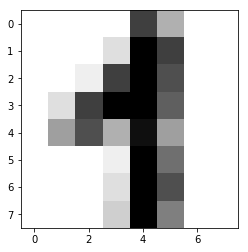

In [10]:
plt.imshow(digits.images[42], cmap=plt.cm.gray_r, interpolation='nearest');

In [11]:
digits.target[42]

1

In [12]:
digits_X, digits_y = digits.data, digits.target

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits_X, digits_y, test_size=0.33, random_state=25)

In [14]:
svc = svm.SVC()

In [15]:
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
y_pred = svc.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5471380471380471

<details><summary>Is accuracy the best metric to use here? Why or why not?</summary>
Accuracy is likely the best metric to use here. Improperly classifying a number is equally bad, no matter what number you incorrectly predict. For example, misclassifying a `4` as a `3` or `5` or `9` is equally bad.
</details>

### Spend three minutes trying different values of `kernel` and `C`. (Feel free to either GridSearch them or just guess and check!) We'll report our top value of accuracy in a moment.

In [18]:
svc = svm.SVC(C = 10.0,
              kernel = 'rbf',
              gamma = 0.001)

svc.fit(X_train, y_train)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
import pandas as pd
results = pd.DataFrame(svc.predict(X_test), columns=['predicted'])
results['true'] = y_test

In [20]:
results.head()

,predicted,true
0,4,4
1,0,0
2,2,2
3,4,4
4,0,0


In [21]:
row_ids = results[results['predicted'] != results.true].index
print(row_ids)

Int64Index([92, 101, 116, 304, 322, 420, 473], dtype='int64')


In [22]:
def print_number(index):
    plt.imshow(digits.images[index], cmap=plt.cm.gray_r, interpolation='nearest'),"\n", "The model guessed this was:", results['predicted'].iloc[index], "\n", "This was meant to be:", results['true'].iloc[index],
    plt.show();
    print("The model guessed this was: ", results['predicted'].iloc[index], "\nThis was meant to be:", results['true'].iloc[index], "\n", "\n","\n")

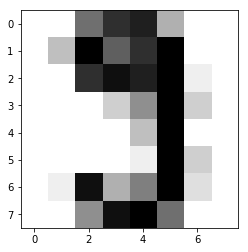

The model guessed this was:  9 
This was meant to be: 5 
 
 



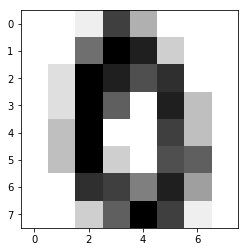

The model guessed this was:  8 
This was meant to be: 9 
 
 



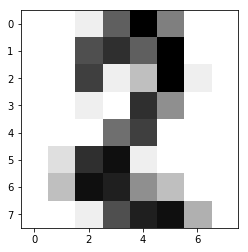

The model guessed this was:  8 
This was meant to be: 6 
 
 



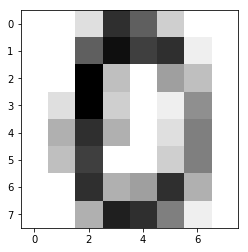

The model guessed this was:  8 
This was meant to be: 9 
 
 



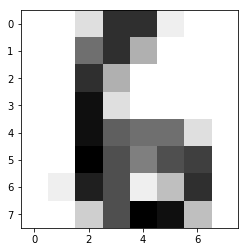

The model guessed this was:  9 
This was meant to be: 7 
 
 



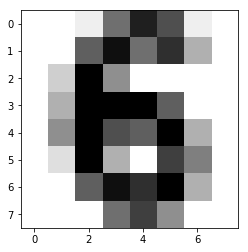

The model guessed this was:  1 
This was meant to be: 8 
 
 



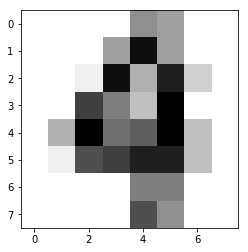

The model guessed this was:  5 
This was meant to be: 3 
 
 



In [23]:
for value in row_ids:
    print_number(value)

### Support Vector Machines aren't even just for classification!

SVMs can be used for regression problems as well! The main ideas are the same - we still specify a cost tolerance `C` and a kernel - but [it's a bit more complicated](https://www.saedsayad.com/support_vector_machine_reg.htm). (For example, visualizing a "margin" is easier to do when we're separating two classes than when we're trying to predict some continuous outcome.) For this reason, we won't get into the mathematical details of support vector machines applied to regression, but we can instantiate a model using `svr = sklearn.svm.SVR()` and `.fit()`, `.predict()` like we do with all of our other models! Check out the documentation for [regression SVMs here](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html).

---
## Learning Objectives

*After this lesson, students will be able to:*
1. **Describe** linear separability.
2. **Differentiate between** maximal margin classifiers, support vector classifiers, and support vector machines.
3. **Implement** SVMs in `scikit-learn`.
4. **Describe** the effects of `C` and kernels on SVMs.